In [23]:
#download if not exists
#!pip install keras
#!pip install tensorflow


In [24]:
import numpy as np
import seaborn as sns
titanic= sns.load_dataset("titanic")
df=titanic.copy()
df.describe([0.01,0.05,0.75,0.90,0.99]).T

,count,mean,std,min,1%,5%,50%,75%,90%,99%,max
survived,891.0,0.383838,0.486592,0.00,0.0,0.000,0.0000,1.0,1.0000,1.00000,1.0000
pclass,891.0,2.308642,0.836071,1.00,1.0,1.000,3.0000,3.0,3.0000,3.00000,3.0000
age,714.0,29.699118,14.526497,0.42,1.0,4.000,28.0000,38.0,50.0000,65.87000,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0,0.000,0.0000,1.0,1.0000,5.00000,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0,0.000,0.0000,0.0,2.0000,4.00000,6.0000
fare,891.0,32.204208,49.693429,0.00,0.0,7.225,14.4542,31.0,77.9583,249.00622,512.3292


In [25]:
import pandas as pd
#check NA values
nas_count = df.isnull().sum()
nas_info = pd.DataFrame({'Feature': nas_count.index, 'Missing_Values': nas_count.values})
nas_info = nas_info[nas_info['Missing_Values'] > 0]

print(nas_info)

        Feature  Missing_Values
3           age             177
7      embarked               2
11         deck             688
12  embark_town               2


In [26]:
df=df.drop(["embark_town", "alive"],axis = 1 )
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,True


In [27]:
import pandas as pd

categorical_columns = df.select_dtypes(include=['category','object']).columns.tolist()

# Print the list of categorical columns
print("Categorical columns in the dataset:")
print(categorical_columns)

Categorical columns in the dataset:
['sex', 'embarked', 'class', 'who', 'deck']


In [28]:
nominal_index = [1, 3]

nominal = [categorical_columns[i] for i in nominal_index]
ordinal = [column for idx, column in enumerate(categorical_columns) if idx not in nominal_index]

print("Nominal variables:", nominal)
print("Ordinal variables:", ordinal)

Nominal variables: ['embarked', 'who']
Ordinal variables: ['sex', 'class', 'deck']


In [29]:
# Using pandas get_dummies for one-hot encoding for nominals droping the first categorical variable for the dummy trap
df = pd.get_dummies(df,columns = nominal,drop_first=True )

df

,survived,pclass,sex,age,sibsp,parch,fare,class,adult_male,deck,alone,embarked_Q,embarked_S,who_man,who_woman
0,0,3,male,22.0,1,0,7.2500,Third,True,NaN,False,0,1,1,0
1,1,1,female,38.0,1,0,71.2833,First,False,C,False,0,0,0,1
2,1,3,female,26.0,0,0,7.9250,Third,False,NaN,True,0,1,0,1
3,1,1,female,35.0,1,0,53.1000,First,False,C,False,0,1,0,1
4,0,3,male,35.0,0,0,8.0500,Third,True,NaN,True,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Second,True,NaN,True,0,1,1,0
887,1,1,female,19.0,0,0,30.0000,First,False,B,True,0,1,0,1
888,0,3,female,NaN,1,2,23.4500,Third,False,NaN,False,0,1,0,1
889,1,1,male,26.0,0,0,30.0000,First,True,C,True,0,0,1,0


In [30]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Dictionary to store the mapping between original and encoded values
encoding_mapping = {}

# Label encode each ordinal column and store the mapping
for column in ordinal:
    df[column] = label_encoder.fit_transform(df[column])
    encoding_mapping[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Display the mapping between original and encoded values
for column, mapping in encoding_mapping.items():
    print(f"\nMapping for {column}:")
    print(mapping)
    
# Display the updated DataFrame
df.head(5)


Mapping for sex:
{'female': 0, 'male': 1}

Mapping for class:
{'First': 0, 'Second': 1, 'Third': 2}

Mapping for deck:
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, nan: 7}


,survived,pclass,sex,age,sibsp,parch,fare,class,adult_male,deck,alone,embarked_Q,embarked_S,who_man,who_woman
0,0,3,1,22.0,1,0,7.2500,2,True,7,False,0,1,1,0
1,1,1,0,38.0,1,0,71.2833,0,False,2,False,0,0,0,1
2,1,3,0,26.0,0,0,7.9250,2,False,7,True,0,1,0,1
3,1,1,0,35.0,1,0,53.1000,0,False,2,False,0,1,0,1
4,0,3,1,35.0,0,0,8.0500,2,True,7,True,0,1,1,0


In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()

dff=pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

dff.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,adult_male,deck,alone,embarked_Q,embarked_S,who_man,who_woman
0,0.0,1.0,1.0,0.271174,0.125,0.0,0.014151,1.0,1.0,1.000000,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,0.472229,0.125,0.0,0.139136,0.0,0.0,0.285714,0.0,0.0,0.0,0.0,1.0
2,1.0,1.0,0.0,0.321438,0.000,0.0,0.015469,1.0,0.0,1.000000,1.0,0.0,1.0,0.0,1.0
3,1.0,0.0,0.0,0.434531,0.125,0.0,0.103644,0.0,0.0,0.285714,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,1.0,0.434531,0.000,0.0,0.015713,1.0,1.0,1.000000,1.0,0.0,1.0,1.0,0.0


In [32]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

dff= pd.DataFrame(imputer.fit_transform(dff), columns = dff.columns)

dff=pd.DataFrame(scaler.inverse_transform(dff), columns = dff.columns)

#check if still there are NA values
nas_count = dff.isnull().sum()
nas_info = pd.DataFrame({'Feature': nas_count.index, 'Missing_Values': nas_count.values})
nas_info = nas_info[nas_info['Missing_Values'] > 0]
print(nas_info)

dff.head()

Empty DataFrame
Columns: [Feature, Missing_Values]
Index: []


,survived,pclass,sex,age,sibsp,parch,fare,class,adult_male,deck,alone,embarked_Q,embarked_S,who_man,who_woman
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,2.0,1.0,7.0,0.0,0.0,1.0,1.0,0.0
1,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,2.0,0.0,7.0,1.0,0.0,1.0,0.0,1.0
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,2.0,1.0,7.0,1.0,0.0,1.0,1.0,0.0


In [33]:
#outlier detection
from sklearn.neighbors import LocalOutlierFactor
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import LocalOutlierFactor

# Create and fit LOF model
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(dff)
# Add the outlier scores to your DataFrame
dff['Outlier_Score'] = clf.negative_outlier_factor_
scores=pd.DataFrame(np.sort(clf.negative_outlier_factor_))

print(-clf.negative_outlier_factor_[0:5])
dff.head(5)

[1.43037038 0.995451   1.1507152  0.9798071  1.0654928 ]


,survived,pclass,sex,age,sibsp,parch,fare,class,adult_male,deck,alone,embarked_Q,embarked_S,who_man,who_woman,Outlier_Score
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,2.0,1.0,7.0,0.0,0.0,1.0,1.0,0.0,-1.430370
1,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,-0.995451
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,2.0,0.0,7.0,1.0,0.0,1.0,0.0,1.0,-1.150715
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,-0.979807
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,2.0,1.0,7.0,1.0,0.0,1.0,1.0,0.0,-1.065493


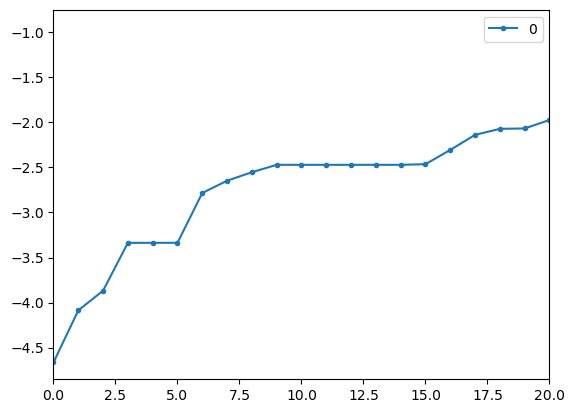

In [35]:
#LOf threshold desicion with elbow
scores.plot(stacked=True,xlim=(0,20),style=".-")
plt.show()

In [36]:
#geting outliers
th = scores[0][3]
print("outlier threshold:" , th)
dff[dff['Outlier_Score'] <= th]

outlier threshold: -3.3370127210531537


,survived,pclass,sex,age,sibsp,parch,fare,class,adult_male,deck,alone,embarked_Q,embarked_S,who_man,who_woman,Outlier_Score
258,1.0,1.0,0.0,35.0,0.0,0.0,512.3292,0.0,0.0,7.0,1.0,0.0,0.0,0.0,1.0,-3.337013
271,1.0,3.0,1.0,25.0,0.0,0.0,0.0000,2.0,1.0,7.0,1.0,0.0,1.0,1.0,0.0,-4.664655
302,0.0,3.0,1.0,19.0,0.0,0.0,0.0000,2.0,1.0,7.0,1.0,0.0,1.0,1.0,0.0,-3.867738
872,0.0,1.0,1.0,33.0,0.0,0.0,5.0000,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,-4.086967


In [37]:
#remove outliers
dff = dff[dff['Outlier_Score'] > th]
dff=dff.drop('Outlier_Score',axis=1)
dff

,survived,pclass,sex,age,sibsp,parch,fare,class,adult_male,deck,alone,embarked_Q,embarked_S,who_man,who_woman
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,2.0,1.0,7.0,0.0,0.0,1.0,1.0,0.0
1,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,2.0,0.0,7.0,1.0,0.0,1.0,0.0,1.0
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,2.0,1.0,7.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,1.0,27.0,0.0,0.0,13.0000,1.0,1.0,7.0,1.0,0.0,1.0,1.0,0.0
887,1.0,1.0,0.0,19.0,0.0,0.0,30.0000,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
888,0.0,3.0,0.0,33.6,1.0,2.0,23.4500,2.0,0.0,7.0,0.0,0.0,1.0,0.0,1.0
889,1.0,1.0,1.0,26.0,0.0,0.0,30.0000,0.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0


In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop

scaler= MinMaxScaler()
dff=pd.DataFrame(scaler.fit_transform(dff), columns = dff.columns)

# Separate features (X) and target variable (y)
X = dff.drop('survived', axis=1)
y = dff['survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize/normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history=model.fit(X_train, y_train, epochs=10, batch_size=3, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


Epoch 1/10
237/237 [==============================] - 2s 3ms/step - loss: 0.5129 - accuracy: 0.7673 - val_loss: 0.4867 - val_accuracy: 0.7921
Epoch 2/10
237/237 [==============================] - 1s 3ms/step - loss: 0.4303 - accuracy: 0.8138 - val_loss: 0.4685 - val_accuracy: 0.7753
Epoch 3/10
237/237 [==============================] - 1s 3ms/step - loss: 0.4135 - accuracy: 0.8181 - val_loss: 0.4744 - val_accuracy: 0.8090
Epoch 4/10
237/237 [==============================] - 0s 2ms/step - loss: 0.4060 - accuracy: 0.8237 - val_loss: 0.4654 - val_accuracy: 0.8034
Epoch 5/10
237/237 [==============================] - 1s 2ms/step - loss: 0.4007 - accuracy: 0.8195 - val_loss: 0.4635 - val_accuracy: 0.8090
Epoch 6/10
237/237 [==============================] - 1s 3ms/step - loss: 0.3963 - accuracy: 0.8279 - val_loss: 0.4604 - val_accuracy: 0.8146
Epoch 7/10
237/237 [==============================] - 0s 2ms/step - loss: 0.3901 - accuracy: 0.8336 - val_loss: 0.4642 - val_accuracy: 0.8258
Epoch 

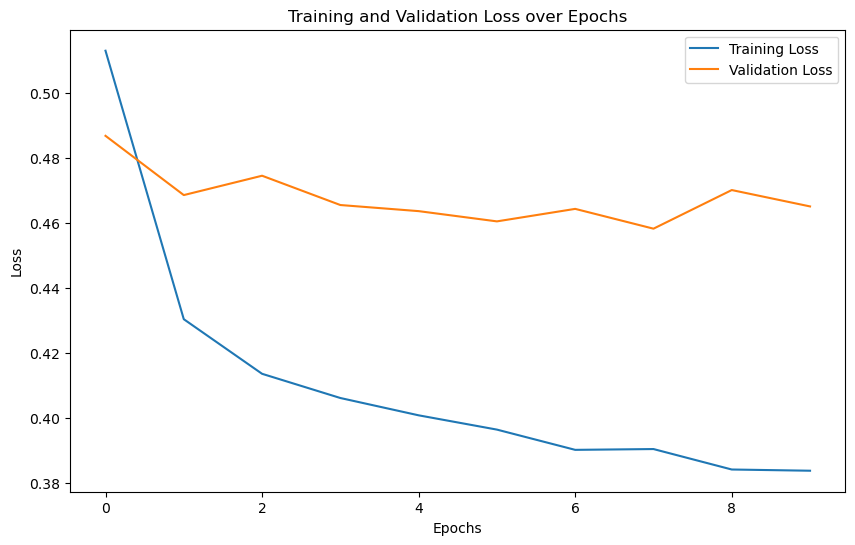

In [39]:

# Plot the training and validation loss
plt.figure(figsize=(10, 6))

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


6/6 [==============================] - 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.92      0.87       106
         1.0       0.85      0.71      0.77        72

    accuracy                           0.83       178
   macro avg       0.84      0.81      0.82       178
weighted avg       0.83      0.83      0.83       178



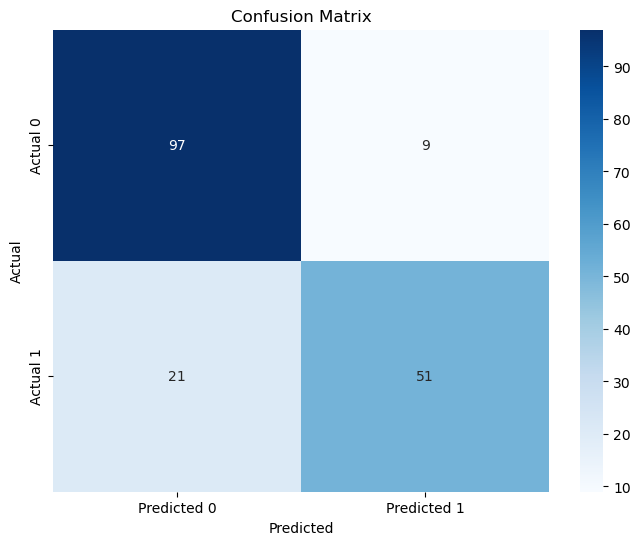

In [40]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict probabilities on the test set
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary values (0 or 1)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# You can also use classification_report for more detailed metrics
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [41]:
#save model
import joblib
joblib.dump(model, 'titanic_model.joblib')




['titanic_model.joblib']

In [42]:
# Load the model from the file
loaded_model = joblib.load("C:\\Users\\MMFH\\Desktop\\python\\.vscode\\titanic_model.joblib")

# Now, you can use the loaded_model for predictions
# For example:
# predictions = loaded_model.predict(X_test)
